In [11]:
# Libraries
import numpy as np; pi=np.pi
import inversionmethods as IM
import matplotlib.pyplot as plt

In [12]:
npz = np.load('synthetic-UEG_testproblem.npz')
for file in npz.files:
    print(file)
    print(np.shape(npz[file]))

A
(201, 500)
x
(500,)
b_avg
(201,)
b_std
(201,)
mu
(500,)
taus
(201,)
omegas
(500,)


In [3]:
A = npz['A']; [Nk, Nomega] = np.shape(A)
x = npz['x']
mu = npz['mu']
b_avg = npz['b_avg']
b_std = npz['b_std']
taus = npz['omegas']
omegas = npz['omegas'];

first set_x just happened.
----------
Iteration: 1
Primal value: 793244427.4078289
Dual value: 6.324740575542284e-08
Primal-Dual Gap: 793244427.407829
Iter: 1, Dual Jacobian Norm: 0.3983075262677895
----------
Summary:
Total iters: 1000
Grad steps: 2
Jacobian Norm: 4.9590337195366105
Primal-Dual Gap: 122960077157.50551
Primal value: 122960080080.01988
Dual value: -2922.514376728943
RMS(Ax-b): 0.3497832734474601
Sum: nan | term 1, a*S, L: nan -6.48e-10 1.2296e+01
Sum x: 1.000e+00 sum m: 1.000e+00
first set_x just happened.
----------
Iteration: 1
Primal value: 570886649.5934175
Dual value: 6.324740575542284e-08
Primal-Dual Gap: 570886649.5934176
Iter: 1, Dual Jacobian Norm: 0.3983075262677895
----------
Summary:
Total iters: 1000
Grad steps: 0
Jacobian Norm: 6.407546818260411
Primal-Dual Gap: 147739436343.8423
Primal value: 147739444343.8065
Dual value: -7999.964210760145
RMS(Ax-b): 0.4519535179006096
Sum: nan | term 1, a*S, L: nan -5.24e-10 2.0528e+01
Sum x: 1.000e+00 sum m: 1.000e+00


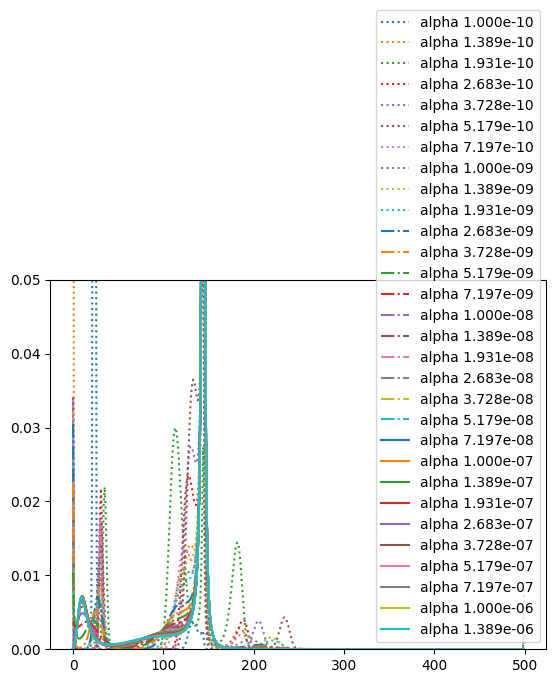

In [9]:
b = b_avg
m = mu
C_iid = np.diag( b_std )
Skw_dMEM = np.zeros((Nomega, Nk))
Skw_dMEM[:,0], P_dMEM = IM.MEM_solve(A, b, C=C_iid, m=m, dual=1, alpha_min=1e-10, alpha_max=1e-3)

first set_x just happened.
----------
Iteration: 1
Primal value: 793244427.4078289
Dual value: 6.324740575542284e-08
Primal-Dual Gap: 793244427.407829
Iter: 1, Dual Jacobian Norm: 0.3983075262677895
----------
Summary:
Total iters: 1000
Grad steps: 2
Jacobian Norm: 4.9590337195366105
Primal-Dual Gap: 122960077157.50551
Primal value: 122960080080.01988
Dual value: -2922.514376728943
RMS(Ax-b): 0.3497832734474601
Sum: nan | term 1, a*S, L: nan -6.48e-10 1.2296e+01
Sum x: 1.000e+00 sum m: 1.000e+00
first set_x just happened.
----------
Iteration: 1
Primal value: 570886649.5934175
Dual value: 6.324740575542284e-08
Primal-Dual Gap: 570886649.5934176
Iter: 1, Dual Jacobian Norm: 0.3983075262677895
----------
Summary:
Total iters: 1000
Grad steps: 0
Jacobian Norm: 6.407546818260411
Primal-Dual Gap: 147739436343.8423
Primal value: 147739444343.8065
Dual value: -7999.964210760145
RMS(Ax-b): 0.4519535179006096
Sum: nan | term 1, a*S, L: nan -5.24e-10 2.0528e+01
Sum x: 1.000e+00 sum m: 1.000e+00


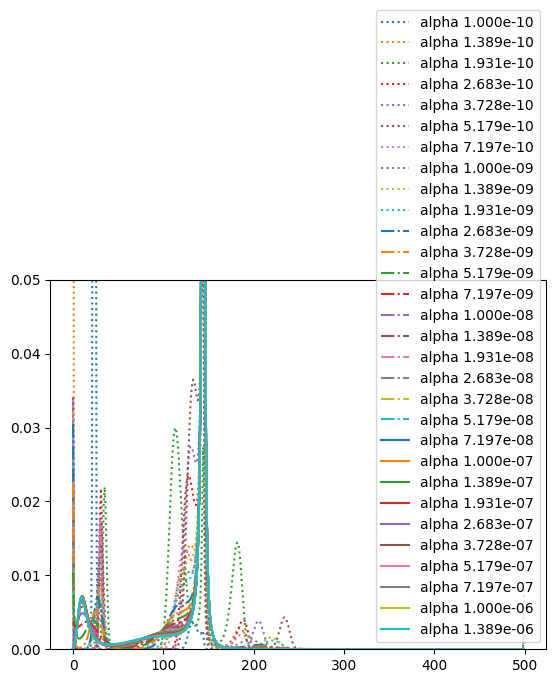

In [13]:
#C_iid = np.diag( np.std(data, axis=0) )
#data_avg = np.average(data,axis=0)
#C = (data-data_avg).T @ (data-data_avg)

Skw_PTIK = np.zeros((Nomega, Nk))
Skw_BGM = np.zeros((Nomega, Nk))
Skw_sBGM = np.zeros((Nomega, Nk))
Skw_pMEM = np.zeros((Nomega, Nk))
Skw_dMEM = np.zeros((Nomega, Nk))

for i in range(1):
    C_iid = np.diag( b_std ) 
    b = b_avg
    m = mu
    
    #x_OLS = IM.TIK_solve(A, b, lam=0, cond_upperbound=1e6);
    #x_TIK = IM.TIK_solve(A, b, lam=-1, cond_upperbound=1e6);
    #Skw_PTIK[:,i] = IM.TIK_solve(A, b, cond_upperbound=1e6, proj_flag=1);
    #x_TIK_dual = IM.TIK_solve_via_dual(A, np.reshape(b,(Ntau,1)), alpha=-1, R=None);
    #x_SD, err = IM.SD_solve(A,b, cond_upperbound=1e6, proj_flag=1);
    #x_CG, err = IM.CG_solve(A,b);
    #Skw_BGM[:,i], glist_BGM, obj_list = IM.BGM_solve(A, b, C_iid, omegas );
    #Skw_sBGM[:,i], glist_BGM_smeared, obj_list_smeared = IM.SmearedBGM_solve(A, b, C_iid, omegas);
    Skw_dMEM[:,i], P_dMEM = IM.MEM_solve(A, b, C=C_iid, m=m, dual=1, alpha_min=1e-10, alpha_max=1e-3)
    #tmp, P_pMEM = IM.MEM_solve(A, b, C=C_iid, m=m, alpha_min=1e-10, alpha_max=1e-3)
    #Skw_pMEM[:,i] = tmp[:,0]

<>:16: SyntaxWarning: invalid escape sequence '\o'
<>:17: SyntaxWarning: invalid escape sequence '\o'
<>:16: SyntaxWarning: invalid escape sequence '\o'
<>:17: SyntaxWarning: invalid escape sequence '\o'
/var/folders/y8/2plbqtpd2y5csxrfjg_fs0qr0000gp/T/ipykernel_35514/3647572306.py:16: SyntaxWarning: invalid escape sequence '\o'
  plt.xlabel("$\omega/\omega_{p,e}$", fontsize=20)
/var/folders/y8/2plbqtpd2y5csxrfjg_fs0qr0000gp/T/ipykernel_35514/3647572306.py:17: SyntaxWarning: invalid escape sequence '\o'
  plt.title("$S(k,\omega)$", fontsize=24)


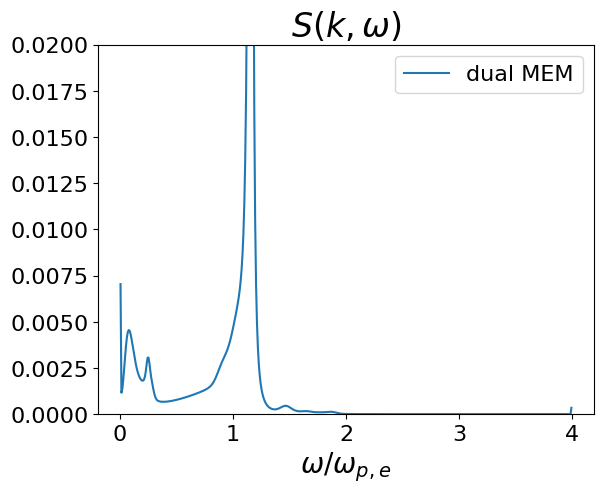

In [14]:
#print(np.shape(Skw_MEM))
plt.figure()
for index in range(1):
    #print( np.sum(normalized_Skw[:,index]) )
    #plt.plot(omegas, 1/310*reconstructions[index,::2,1], color='black', marker='o', label="Tobias")
    #plt.plot(omegas, normalized_Skw[:,index], color='black', marker='.')
    #plt.plot(omegas, x, label="A.A. UEG", color='black', marker='o', markevery=14)
    #plt.plot(omegas, mu, color='black', marker='x', label="RPA UEG", markevery=17)
    #plt.plot(omegas, Skw_BGM[:,index], label="BGM", c='r')
    #plt.plot(omegas, Skw_sBGM[:,index], label="SBGM", c='b')
    #plt.plot(omegas, Skw_pMEM[:,index], label="primal MEM", markevery=20)
    plt.plot(omegas, Skw_dMEM[:,index], label="dual MEM", markevery=20)
#plt.plot(omegas, x0/np.sum(x0), label='prior: $\S_{RPA}(k/k_{D,e}=.12,\omega/\omega_{p,e})$', c='black')
#plt.xlim([0,1.5])
plt.ylim([0,.02])
plt.xlabel("$\omega/\omega_{p,e}$", fontsize=20)
plt.title("$S(k,\omega)$", fontsize=24)
plt.tick_params(axis='both', labelsize=16)
plt.legend(fontsize=16, loc='upper right')
plt.savefig("synthetic-UEG_reconstructions_noise-0p0001_prior-RPA.png", bbox_inches="tight")